<a href="https://colab.research.google.com/github/ai-beyondpapers/beyondpapers/blob/master/Switcher_Getting_Started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Swicher is currently actively in development. This is just beta release for testing


## Install beyondpapers using pip

In [ ]:
#Note: Switcher uses tensorflow in backend for ANN regressors.Hence make sure tensorflow -2 is installed correctly
#And dont worry if have not used tensorflow before. Beyonpapers has made it easier to build vannila DEEP ANN.

!pip install beyondpapers

## Importing required packages

In [ ]:
from beyondpapers.switcher import Switcher   #in local this might some time to load first time as in backend tesorflow is loaded as well

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

###  Regression Dataset for training and test
Swicher was primarily created for Regression problems. More algorithms will be added to beyondpapers in future which might be relevant for classification case 


In [ ]:
raw_data = load_boston()
X=raw_data['data']
y=raw_data['target']

np.random.seed(100)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=200)

### Modelling with Switcher

In [ ]:
learner = Switcher() #load the model

learner.fit(X_train,y_train)   #fit the model

Switchers will be training multiple deepANN hence might take somtime. Progress bars will be added in future

In [ ]:
ytrain_pred=learner.predict(X_train)
ytest_pred=learner.predict(X_test)


In [ ]:
train_error=mean_squared_error(y_train,ytrain_pred,squared=False)

print(f"Train Error: {train_error}")

Train Error: 2.3723221673425123


In [ ]:
test_error=mean_squared_error(y_test,ytest_pred,squared=False)

print(f"Test Error: {test_error}") 

Test Error: 4.973980666086838


Text(0.5, 1.0, 'test')

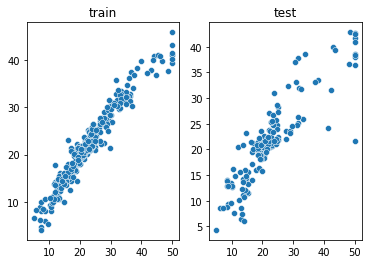

In [ ]:
plt.subplot(1,2,1)

sns.scatterplot(x=y_train,y=ytrain_pred).set_title('train')


plt.subplot(1,2,2)
sns.scatterplot(x=y_test,y=ytest_pred).set_title('test')


### But what did switcher do?

**Fit/Train Cylce**:
1.Switcher splits data into 4 random splits 

2.Classifier tries make it less random by attempting to predict random split.  

3.Seperate deep neural network learners are trained each split over specified number of epochs or iterations. Total 4 neural networks in this case

4.Observations switches to different split if different learner predicted it best. 

5. 3 & 4 are repeated based switch specified. By default 4 switches.

6. Finally Classifier learners the best split for a obs.

**Predict/Test Cycle**:
1. Classifier splits data in groups equalt to number of splits

2. DeenANN of that split predict the value


In [ ]:
#### Below is switchers default specifications
from beyondpapers.regressors import tensorflow_AnnRegressor
from sklearn.ensemble import RandomForestClassifier

Switcher(base_model=tensorflow_AnnRegressor(), #Base Regressor Tensorflow based
             meta_learner=RandomForestClassifier(), #Classifier which learns the best split
             split=4, #number of groups data should be split into
             switch=20, #After every switch learners switch data between them based on error perf
                        #best learner for a obs gets the data 
             base_learner_initialize=False,
             split_group=None, 
             split_learn_mode='pre-post',#Classifier is fit twice post random split before Regressors
                                         #After regression ans switching process completes.
                                         #other configration are under test will be released and
                                         #and documented soon
             split_weights=np.nan,
             split_learners=np.nan, 
             random_state=100)

## So Does switcher do better job than just running just Deepneural Network?

In [ ]:
tf_ann = tensorflow_AnnRegressor(epochs=200)   #default is 10 epochs

In [ ]:
tf_ann.fit(X_train,y_train)

In [ ]:
ytrain_tfpred=tf_ann.predict(X_train)
ytest_tfpred=tf_ann.predict(X_test)

In [ ]:
train_tferror=mean_squared_error(y_train,ytrain_tfpred,squared=False)

print(f"Train Error: {train_tferror}")

Train Error: 3.88783968045196


In [ ]:
test_tferror=mean_squared_error(y_test,ytest_tfpred,squared=False)

print(f"Train Error: {test_tferror}")

Train Error: 5.781735246191603


In [ ]:
tf_ann.model.summary() #Two hidden layer with 120 units each adn 1 output layer.

Model: "sequential_168"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_504 (Dense)            (None, 120)               1680      
_________________________________________________________________
dense_505 (Dense)            (None, 120)               14520     
_________________________________________________________________
dense_506 (Dense)            (None, 1)                 121       
Total params: 16,321
Trainable params: 16,321
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'tf test')

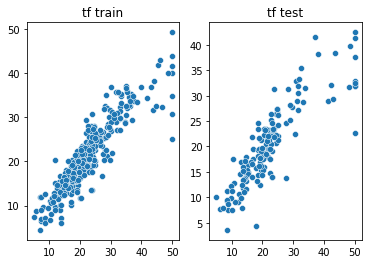

In [ ]:
plt.subplot(1,2,1)

sns.scatterplot(x=y_train,y=ytrain_tfpred).set_title('tf train')


plt.subplot(1,2,2)
sns.scatterplot(x=y_test,y=ytest_tfpred).set_title('tf test')

Text(0.5, 1.0, 'Swicher test')

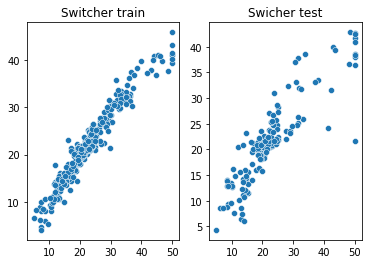

In [ ]:
#Compare again

plt.subplot(1,2,1)
sns.scatterplot(x=y_train,y=ytrain_pred).set_title('Switcher train')
plt.subplot(1,2,2)
sns.scatterplot(x=y_test,y=ytest_pred).set_title('Swicher test')

#### Switchers seems to have made sLigHt better predictions. Anyhow its not significantly better. 

#### Switcher is extermely versatile based on architecture choices 

#### After Further experiments is being carried out on with artificial and real life datatsets.

#### Switchers assumption is if data has hidden groups that behave siginificantly different from other groups then switchers could divide and create curated learners



